# Coindesk

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [2]:
url = "https://api.coindesk.com/v1/bpi/currentprice.json"

In [3]:
r = requests.get(url)

In [4]:
print(r.json())

{'chartName': 'Bitcoin', 'time': {'updateduk': 'Apr 19, 2018 at 18:28 BST', 'updated': 'Apr 19, 2018 17:28:00 UTC', 'updatedISO': '2018-04-19T17:28:00+00:00'}, 'bpi': {'GBP': {'rate': '5,807.9208', 'rate_float': 5807.9208, 'description': 'British Pound Sterling', 'symbol': '&pound;', 'code': 'GBP'}, 'USD': {'rate': '8,243.3538', 'rate_float': 8243.3538, 'description': 'United States Dollar', 'symbol': '&#36;', 'code': 'USD'}, 'EUR': {'rate': '6,677.4215', 'rate_float': 6677.4215, 'description': 'Euro', 'symbol': '&euro;', 'code': 'EUR'}}, 'disclaimer': 'This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org'}


In [5]:
df_coindesk = pd.read_csv("coindesk-bpi-USD-close_data-2017-03-04_2018-03-04.csv")

In [6]:
df_coindesk.head()

,Date,Close Price
0,2017-03-04 00:00:00,1267.68
1,2017-03-05 00:00:00,1277.68
2,2017-03-06 00:00:00,1280.87
3,2017-03-07 00:00:00,1232.43
4,2017-03-08 00:00:00,1150.48


In [7]:
df_coindesk.tail()

,Date,Close Price
363,2018-03-02 00:00:00,11019.52
364,2018-03-03 00:00:00,11438.65
365,2018-03-04 07:25:00,11122.63
366,This data was produced from the CoinDesk price...,NaN
367,http://www.coindesk.com/price/,NaN


In [8]:
df_coindesk = df_coindesk.dropna()

In [9]:
df_coindesk['Date'] = pd.to_datetime(df_coindesk['Date'], format = '%Y-%m-%d')

In [10]:
df_coindesk.index = df_coindesk['Date']

In [11]:
df_coindesk.tail()

,Date,Close Price
Date,,
2018-02-28 00:00:00,2018-02-28 00:00:00,10309.64
2018-03-01 00:00:00,2018-03-01 00:00:00,10907.59
2018-03-02 00:00:00,2018-03-02 00:00:00,11019.52
2018-03-03 00:00:00,2018-03-03 00:00:00,11438.65
2018-03-04 07:25:00,2018-03-04 07:25:00,11122.63


In [12]:
del df_coindesk['Date']

In [13]:
df_coindesk.head()

,Close Price
Date,
2017-03-04,1267.68
2017-03-05,1277.68
2017-03-06,1280.87
2017-03-07,1232.43
2017-03-08,1150.48


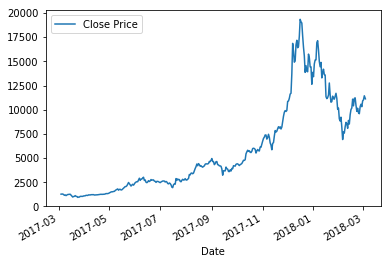

In [14]:
df_coindesk.plot()
plt.show()

# Quandl

In [15]:
import os
import numpy as np
import pandas as pd
import pickle
import quandl
from datetime import datetime

In [16]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

In [17]:
def get_quandl_data(quandl_id):
    '''Download and cache Quandl dataseries'''
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns="pandas")
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_id, cache_path))
    return df

In [18]:
# Pull Kraken BTC price exchange data
btc_usd_price_kraken = get_quandl_data('BCHARTS/KRAKENUSD')

Loaded BCHARTS/KRAKENUSD from cache


In [19]:
btc_usd_price_kraken.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-07,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522
2014-01-08,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269
2014-01-09,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913
2014-01-10,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794
2014-01-11,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709


In [20]:
btc_usd_price_kraken.tail()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2018-02-27,10326.8,10878.9,10123.7,10551.0,7361.214381,7.794949e+07,10589.216089
2018-02-28,10569.0,11081.4,10260.1,10310.0,8552.477806,9.078958e+07,10615.587987
2018-03-01,10309.0,11079.3,10130.0,10920.0,7852.274075,8.379675e+07,10671.653953
2018-03-02,10920.0,11190.0,10778.8,11031.3,5738.531356,6.299225e+07,10977.067909
2018-03-03,11031.3,11528.9,11031.3,11382.1,4717.759395,5.356842e+07,11354.631808


In [21]:
# Chart the BTC pricing data
btc_trace = go.Scatter(x=btc_usd_price_kraken.index, y=btc_usd_price_kraken['Weighted Price'])
py.iplot([btc_trace])

October-February Tweet collection

# Pull pricing data for 3 more BTC exchanges

In [34]:
exchanges = ['COINBASE','BITSTAMP','ITBIT']

exchange_data = {}

exchange_data['KRAKEN'] = btc_usd_price_kraken

for exchange in exchanges:
    exchange_code = 'BCHARTS/{}USD'.format(exchange)
    btc_exchange_df = get_quandl_data(exchange_code)
    exchange_data[exchange] = btc_exchange_df

Loaded BCHARTS/COINBASEUSD from cache
Loaded BCHARTS/BITSTAMPUSD from cache
Loaded BCHARTS/ITBITUSD from cache


In [35]:
def merge_dfs_on_column(dataframes, labels, col):
    '''Merge a single column of each dataframe into a new combined dataframe'''
    series_dict = {}
    for index in range(len(dataframes)):
        series_dict[labels[index]] = dataframes[index][col]
        
    return pd.DataFrame(series_dict)

In [36]:
# Merge the BTC price dataseries' into a single dataframe
btc_usd_datasets = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'Weighted Price')

In [39]:
btc_usd_datasets.head()

,BITSTAMP,COINBASE,ITBIT,KRAKEN
Date,,,,
2011-09-13,5.929231,NaN,NaN,NaN
2011-09-14,5.590798,NaN,NaN,NaN
2011-09-15,5.094272,NaN,NaN,NaN
2011-09-16,4.854515,NaN,NaN,NaN
2011-09-17,4.870000,NaN,NaN,NaN


In [26]:
def df_scatter(df, title, seperate_y_axis=False, y_axis_label='', scale='linear', initial_hide=False):
    '''Generate a scatter plot of the entire dataframe'''
    label_arr = list(df)
    series_arr = list(map(lambda col: df[col], label_arr))
    
    layout = go.Layout(
        title=title,
        legend=dict(orientation="h"),
        xaxis=dict(type='date'),
        yaxis=dict(
            title=y_axis_label,
            showticklabels= not seperate_y_axis,
            type=scale
        )
    )
    
    y_axis_config = dict(
        overlaying='y',
        showticklabels=False,
        type=scale )
    
    visibility = 'visible'
    if initial_hide:
        visibility = 'legendonly'
        
    # Form Trace For Each Series
    trace_arr = []
    for index, series in enumerate(series_arr):
        trace = go.Scatter(
            x=series.index, 
            y=series, 
            name=label_arr[index],
            visible=visibility
        )
        
        # Add seperate axis for the series
        if seperate_y_axis:
            trace['yaxis'] = 'y{}'.format(index + 1)
            layout['yaxis{}'.format(index + 1)] = y_axis_config    
        trace_arr.append(trace)

    fig = go.Figure(data=trace_arr, layout=layout)
    py.iplot(fig)

In [40]:
# Plot all of the BTC exchange prices
df_scatter(btc_usd_datasets, 'Bitcoin Price (USD) By Exchange')

In [41]:
# Remove "0" values
btc_usd_datasets.replace(0, np.nan, inplace=True)

In [42]:
# Plot the revised dataframe
df_scatter(btc_usd_datasets, 'Bitcoin Price (USD) By Exchange')

In [43]:
# Calculate the average BTC price as a new column
btc_usd_datasets['avg_btc_price_usd'] = btc_usd_datasets.mean(axis=1)

In [44]:
# Plot the average BTC price
btc_trace = go.Scatter(x=btc_usd_datasets.index, y=btc_usd_datasets['avg_btc_price_usd'])
py.iplot([btc_trace])

In [45]:
btc_usd_datasets.tail()

,BITSTAMP,COINBASE,ITBIT,KRAKEN,avg_btc_price_usd
Date,,,,,
2018-02-27,10576.641686,10546.235594,10565.263749,10589.216089,10569.339280
2018-02-28,10624.382893,10643.053573,10621.099426,10615.587987,10626.030970
2018-03-01,10727.272600,10710.946064,10678.156872,10671.653953,10697.007372
2018-03-02,10980.298658,10982.181881,10973.434045,10977.067909,10978.245623
2018-03-03,11331.435590,11311.717119,11292.588544,11354.631808,11322.593265


In [46]:
btc_usd_datasets.to_csv("Bitcoin_4prices_total.csv")